<h1>How to Predict the Prices of Used Cars</h1>
<p>Subtitle: Using supervised learning to build a price-prediction algorithm</p>
<p style="margin-bottom:0 !important;">Created: 2020-05-2020</p>
<p>Author: <a href="https://sthakur.work">Shambhavi Thakur</a></p>

## Introduction

When we want to sell used cars, one of the biggest problems is deciding reasonable selling prices for the cars. An effective way to solve this problem is to use a machine-learning model that can predict car prices.

In this notebook, I use Python code and libraries to build a price-prediction model. The notebook is an implementation of the project [Predicting the Prices of Used Cars](https://sthakur.work/predicting-used-car-prices).

Let us understand the objectives and implemention strategy of the project first. Subsequently, we will discuss and run the project&nbsp;code.

## Project objectives

The main objectives of this project are as follows:

- Identify relevant machine-learning algorithms for the project.

- Build price-prediction models based on the chosen algorithms.

- Validate the models.

- Identify the most accurate model.


## Implementation strategy

To achieve the project objectives, I intend to work through the following steps:

1. [Identify machine-learning algorithms that can help predict car prices.](#step1-desc)<a name="step1"></a>

2. [Obtain a dataset about used&nbsp;cars.](#step2-desc)<a name="step2"></a>

3. [Explore and clean the dataset.](#step3-desc)<a name="step3"></a>

4. [Visualize the dataset and clean it further.](#step4-desc)<a name="step4"></a>

5. [Split the dataset for training and testing.](#step5-desc)<a name="step5"></a>

6. [Build and validate price-prediction models.](#step6-desc)<a name="step6"></a>

7. [Identify the most appropriate model.](#step7-desc)<a name="step7"></a>

<h2>Step 1: Identifying machine-learning algorithms<a aria-pressed="true" class="btn btn-primary btn-sm" data-toggle="popover" id='step1-desc' href="#step1" role="button" style="color: white; margin-left: 20px; target='_self'">Go to steplist</a></h2>

Cars have been bought and sold for a long time, and there are numerous data sets that list features of cars and their prices. As we can easily obtain a data set of this type, I am opting for supervised learning in this project.

### Tasks that comprise supervised learning

Supervised learning is all about training an algorithm using prepared, labeled&nbsp;data. Supervised learning for car-price prediction involves the following tasks:

1. Obtain a dataset that contains the attributes of various cars, including their prices and mileage.

2. Split the dataset into training and testing datasets.

3. Train a machine-learning model using the training dataset.

4. Once the model has been trained, validate it by passing on to it all columns from the testing data except the price column. The accuracy of the algorithm depends on how close the prices it predicts are to the actual prices in the testing dataset.

### Types of supervised learning

Supervised learning is of two types, regression and classification. When the target variable is numerical, we have a regression problem. When the target variable is categorical, we have a classification problem.

The target variable for this project, car price, is definitely numerical. So, regression will be the most appropriate for this project.

### Regression algorithms

Regression algorithms are of various types. In this project, we will build and compare models based on four regression algorithms, or regressors. Here is a description of these regressors:

- **Linear**: A linear regressor uses linear or step-by-step techniques to find out how a target, or dependent, variable is related to one or more independent variables.

- **Random forest**: Given a set of independent variables, a random-forest regressor uses multiple decision trees—in other words, a forest of decision trees—to predict the value of the corresponding target variable. It uses the collective knowledge of the forest to determine which independent variables have the maximum impact on the target variable and predicts values accordingly.

- **XGBoost**: Short for extreme gradient boosting, XGBoost is a library that lets us build highly efficient decision trees. Using an XGBoost regressor, we can train different models in tandem. Each model learns from and improves upon the model that preceded it. Collectively, all the models based on an XGBoost regressor determine the impact that independent variables have on the corresponding target variable and rank the independent variables accordingly. This ranking eventually enables the XGBoost regressor to predict target values.

<h2>Step 2: Obtaining a dataset<a aria-pressed="true" class="btn btn-primary btn-sm" data-toggle="popover" id='step2-desc' href="#step2" role="button" style="color: white; margin-left: 20px; target='_self'">Go to steplist</a></h2>

We will use a [Kaggle dataset](https://www.kaggle.com/austinreese/craigslist-carstrucks-data) for this project. This dataset contains data that was scraped recently from Craiglist in the United States&nbsp;(US).

I have already added the dataset to the project environment. Here is code that lists the path to the dataset:

In [1]:
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input/craigslist-carstrucks-data/vehicles.csv


<h2>Step 3: Exploring and cleaning the dataset<a aria-pressed="true" class="btn btn-primary btn-sm" data-toggle="popover" id='step3-desc' href="#step3" role="button" style="color: white; margin-left: 20px; target='_self'">Go to steplist</a></h2>

To explore the dataset, we will first save it as a pandas dataframe. Then, we will view the contents and properties of the dataset and, if required, clean it.

### Converting the dataset into a pandas dataframe

We will begin by importing pandas, the standard data-science package.

In [2]:
import pandas as pd

Next, we will import the dataset.

In [3]:
df_original = pd.read_csv('../input/craigslist-carstrucks-data/vehicles.csv')

### Looking at the contents of the dataset

Let us browse through the first few rows of the dataset.

In [4]:
import numpy as np

df = df_original.copy()

df.iloc[np.r_[0:3, -3:0]]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
435846,7120896708,https://oregoncoast.craigslist.org/cto/d/corne...,oregon coast,https://oregoncoast.craigslist.org,2450,2001.0,ford,focus,good,4 cylinders,...,rwd,compact,other,black,https://images.craigslist.org/00707_6cmfCa9Pc9...,"I am selling my ford focus 2001 SE, 130 thousa...",NaN,or,45.5272,-123.0950
435847,7120885819,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,8995,2013.0,mazda,mazda3,NaN,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00j0j_jEvFN3iSx1...,Simple Easy Car BuyingNo Games No Gimmicks ...,NaN,or,45.5231,-122.5790
435848,7112215161,https://rapidcity.craigslist.org/ctd/d/rapid-c...,rapid city / west SD,https://rapidcity.craigslist.org,6577,2010.0,dodge,grand caravan,NaN,NaN,...,fwd,NaN,mini-van,blue,https://images.craigslist.org/00f0f_5yUMSGZFBn...,2010 Dodge Grand Caravan SXT Offered by: L...,NaN,sd,44.0804,-103.1910


### Cleaning the dataset

Some of the dataset columns, such as url and region_url, seem irrelevant to this project, and some columns have NaN, or null, values. In addition, the price column, which represents our target variable (the values that our algorithm should predict), seems to lose its relevance sandwiched between all the other columns. We need to move it to the end of the dataset.

Let us remove the irrelevant columns first.

In [5]:
irrelevant_cols = ['id', 'url', 'region_url', 'vin', 'image_url', \
                   'description', 'county']

df = df.drop(columns=irrelevant_cols)

Next, let us reposition the price column.

In [6]:
col_list = ['price']
rearranged_cols = np.hstack((df.columns.difference(col_list, sort=False), col_list))

df = df.reindex(columns=rearranged_cols)

Here is the structure of the edited dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        435849 non-null  object 
 1   year          434732 non-null  float64
 2   manufacturer  415102 non-null  object 
 3   model         429650 non-null  object 
 4   condition     249043 non-null  object 
 5   cylinders     269465 non-null  object 
 6   fuel          432858 non-null  object 
 7   odometer      360701 non-null  float64
 8   title_status  434043 non-null  object 
 9   transmission  433703 non-null  object 
 10  drive         313838 non-null  object 
 11  size          139888 non-null  object 
 12  type          318741 non-null  object 
 13  paint_color   300602 non-null  object 
 14  state         435849 non-null  object 
 15  lat           427614 non-null  float64
 16  long          427614 non-null  float64
 17  price         435849 non-null  int64  
dtypes: f

So, some of the columns have been removed and the price column is at the end of the dataset. However, there are still quite a few columns with null values.

Let us determine the total number of null values in each column.

In [8]:
df.isnull().sum()

region               0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
drive           122011
size            295961
type            117108
paint_color     135247
state                0
lat               8235
long              8235
price                0
dtype: int64

Let us also depict the distribution of the null values via a graph.

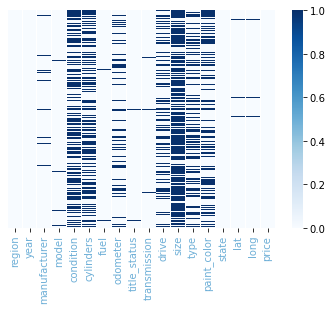

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_map = sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='Blues')
_ = heat_map.set_xticklabels(heat_map.get_xticklabels(), color='#6eafd7')

Missing values can lead to errors in machine-learning models. To avoid these errors, we can use one of the following workarounds:

- Remove each row that contains any missing values.

- Replace missing values with estimates by using scikit-learn imputers.

As we want our algorithms to be accurate, we must retain as much of the car data as possible. Therefore, we will opt for the second workaround.

Before we use imputers on the dataset, however, let us organize some of its column names into two groups, numerical and categorical. We will use the corresponding columns as independent variables for our models.

Here are the groups:

In [10]:
numerical = ['year', 'odometer', 'lat', 'long']

categorical = ['region', 'condition','cylinders',\
               'fuel', 'title_status', 'transmission',\
               'drive', 'size', 'type', 'paint_color', 'state']

We excluded manufacturer and model from the categorical list because we want to avoid any incorrect combinations of manufacturers and models.

Next, we will make sure that all string values in the dataset are in lowercase and do not contain any unnecessary spaces.

Here is the code that we will use:

In [11]:
for column in df.columns[1:]:
    if df[column].dtype == 'object':
        df[column] = df[column].str.lower().str.strip()

We are now ready to replace all the null values in the dataset with estimated values. We will fill out the numerical columns of the dataset by using Extratreesregressor. And, to fill out the categorical columns, we will use BayesianRidge.

How do Extratreesregressor and BayesianRidge work?

Extratreesregressor divides a target dataset into smaller subsets. Then, it uses multiple decision trees, or extra trees, on the subsets to determine how various attributes of the dataset interrelate. It combines the findings of the trees to generate an average value for each null&nbsp;field.

An imputer of the Extratreesregressor type prevents overfitting. In other words, it allows us to create models that can transfer what they learn from training datasets to other, real-world datasets and make highly accurate predictions.

Unlike Extratreesregressor, BayesianRidge uses linear regression to determine relationships between variables. Based on these relationships, it generates regularized values for non-null fields.

To be able to use the Extratreesregressor and BayesianRidge imputers, we will first import relevant modules. We will also save the initializers of these imputers in a&nbsp;list:

In [12]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer

from sklearn import preprocessing
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor

imputers = [
    BayesianRidge(),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
]

Now, let us use the items in the `imputers` list to generate values.

First, we will use Extratreesregressor to fill out the null fields of the numerical columns.

In [13]:
sr_numerical = df[numerical]
imp_numerical = IterativeImputer(imputers[1])
imputed_vals = imp_numerical.fit_transform(sr_numerical)
df[numerical] = imputed_vals

The numerical columns do not have any null values now.

In [14]:
df.isnull().sum()[numerical]

year        0
odometer    0
lat         0
long        0
dtype: int64

Next, we will use BayesianRidge to generate values for the null fields of the categorical columns.

The BayesianRidge algorithm will generate the required values based on the data that already exist in the categorical columns. But the algorithm cannot understand the existing data in their raw form because they are strings. We will have to encode these strings first.

Here is a function that can do the encoding&nbsp;for&nbsp;us:

In [15]:
def encode(data_col):
    '''A function that transforms non-null values'''
    vals = np.array(data_col.dropna())
    # Reshaping the non-null data of a column
    reshaped_data = vals.reshape(-1,1)
    # Encoding the reshaped data
    encoded_data = encoder.fit_transform(reshaped_data)
    # Assigning the encoded values to the corresponding column values
    data_col.loc[data_col.notnull()] = np.squeeze(encoded_data)
    return data_col

Now, let us use the `encode` function along with other code to update the categorical columns.

In [16]:
sr_categorical = df[categorical]
encoder = preprocessing.LabelEncoder()

# Using a for loop to iterate through each categorical column and
# filling out its null fields
for column in categorical:
    encode(sr_categorical[column])
    imp_categorical = IterativeImputer(BayesianRidge())
    imputed_vals_cat = imp_categorical.fit_transform(sr_categorical[column].values.reshape(-1, 1))
    imputed_vals_cat = imputed_vals_cat.astype('int64')
    imputed_vals_cat = pd.DataFrame(imputed_vals_cat)
    imputed_vals_cat = encoder.inverse_transform(imputed_vals_cat.values.reshape(-1, 1))
    sr_categorical[column] = imputed_vals_cat

df[categorical]= sr_categorical

The categorical columns also don't have any null values&nbsp;now.

In [17]:
df.isnull().sum()[categorical]

region          0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

Here are the first five rows of the updated dataset:

In [18]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,price
0,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,pickup,silver,az,34.4554,-114.2690,3495
1,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,or,46.1837,-123.8240,13750
2,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,pickup,grey,sc,34.9352,-81.9654,2300
3,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,az,34.4783,-114.2710,9000
4,maine,2021.0,NaN,honda-nissan-kia-ford-hyundai-vw,fair,5 cylinders,other,69919.8,clean,other,4wd,full-size,pickup,grey,me,44.4699,-68.8963,0


In the 5<sup>th</sup> row, the model name seems unrealistic. There are other such model names in the dataset. For example, one model name contains a monetary value,&nbsp;$500.

In [19]:
df.loc[:, ['region', 'manufacturer', 'model']]\
[df.model.str.startswith(r'$500', na=False)]

,region,manufacturer,model
5,maine,NaN,$500 down programs!!!
26442,boston,NaN,$500 down programs!
180783,las vegas,NaN,$500 down
235958,maine,NaN,$500 down programs!!!
244169,new hampshire,NaN,$500 down programs!!!
293551,new hampshire,NaN,$500 down programs!!!


We will delete such unrealistic model names later. Right now, let us delete all rows of the dataset that still have null values.

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
price           0
dtype: int64

How many unique values does each dataset column have now?

In [22]:
df.apply(pd.Series.nunique)

region             402
year               107
manufacturer        42
model            26049
condition            6
cylinders            8
fuel                 5
odometer        133585
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
lat              48457
long             47713
price            16350
dtype: int64

The dataset has a large number of car models at present. We will remove many of these models later. This step will reduce the number of unrealistic model names in our dataset. It will also ensure that the dataset has an adequate number of cars of each model—a crucial factor when training machine-learning models.

Aside from the number of models, another conspicuous fact is that there is one additional value in the state column. It is 'dc' and represents District of Columbia, which is a federal district rather than a state. We will let this inconsistency be. Car prices are probably different in District of Columbia compared to the rest of Washington state. Our algorithms should be able to figure this&nbsp;out.

So, the dataset is fairly clean now. Let us save it as a CSV file.

In [23]:
df.to_csv('vehicles_eda.csv', index=False)

Now we will proceed to visualizing the contents of the updated dataset and cleaning it further.

<h2>Step 4: Visualization and further cleaning<a aria-pressed="true" class="btn btn-primary btn-sm" data-toggle="popover" id='step4-desc' href="#step4" role="button" style="color: white; margin-left: 20px; target='_self'">Go to steplist</a></h2>

We will begin this step by looking at the distribution of the target variable, price. We will use a seaborn distplot for this purpose.

As we want to create multiple seaborn distplots, let us write a reusable plot-drawing function first.

In [24]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(6,3)})

def plot_histogram(col, color_val='#005c9d',\
                   x_label='Price [x10\u2076 USD]', y_label='Frequency',\
                   title_text='Distribution of car prices'):
    sns.distplot(col, kde=False, color=color_val)
    
    ax = plt.gca()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title_text)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

    plt.show()

We will also import the CSV file that we had saved in the previous step.

In [25]:
df = pd.read_csv('vehicles_eda.csv')

Using the `plot_histogram` function on the price column of the dataset, we get the following plot.

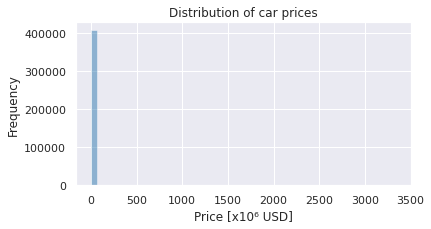

In [26]:
price_mill = df.price/10**6
plot_histogram(price_mill)

The plot indicates that the prices are skewed toward the left, with the maximum number of cars hovering around&nbsp;zero.

For a better perspective, let us view the distribution in the USD&nbsp;0–60,000 range.

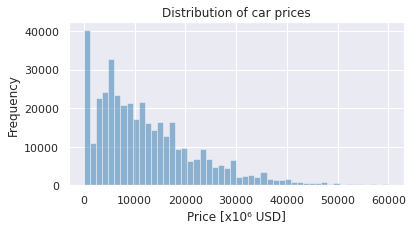

In [27]:
plot_histogram(df.price[df.price<60000])

Apparently, a large number of cars in the database are priced at 0. Here is code that proves this:

In [28]:
price_counts = df.price.value_counts()
print('Price: ', price_counts.index[0], '\nCounts: ', price_counts.values[0])
print('\nTen most frequently occurring prices:\n')
print(price_counts[:10])

Price:  0 
Counts:  28597

Ten most frequently occurring prices:

0       28597
6995     3826
7995     3771
5995     3636
8995     3564
4500     3537
3500     3390
9995     3270
5500     3249
4995     3216
Name: price, dtype: int64


How do the mean and the median of the prices compare? 

In [29]:
print('Mean:', df.price.mean())
print()
print('Median: ', df.price.median())

Mean: 101053.03661718355

Median:  9995.0


The minimum price is 0. What is the maximum price?

In [30]:
print('Max. price: ', df.price.max())

Max. price:  3333333333


The huge difference between the mean and the median corroborates that there are outliers in the price data. In addition, the maximum price is unrealistic.

The minimum price is also unrealistic for us. It does not conform to our requirements. We definitely don't want our algorithms to learn about cars whose prices are pegged at 0. The model will be a price-predictor, after&nbsp;all. So, let us remove rows where the price is 0 and reset the database index.

Let us look at some of the attributes of cars with the highest prices.

In [31]:
cols = ['region', 'year', 'manufacturer', 'model', 'price']

df.loc[:, cols][df.price>100000].sort_values(by='price', ascending=False).head(10)

,region,year,manufacturer,model,price
38681,tucson,1973.0,mazda,rx3,3333333333
322630,el paso,1973.0,mazda,rx3,2989542968
293329,bend,1973.0,mazda,rx2,2989542968
344198,odessa / midland,1973.0,mazda,rx3,2989542968
73892,eastern NC,1997.0,dodge,3500,2525141468
342247,kennewick-pasco-richland,1964.0,volvo,544,2521176519
62113,atlanta,2011.0,ford,fiesta,2490531375
165667,susanville,1973.0,mazda,rx2,2457308728
284912,oklahoma city,1973.0,mazda,rx3,2371699370
31750,wyoming,1973.0,mazda,rx3,2242157226


Well, a 1997 Dodge RAM 3500 shouldn't cost USD 2+ billions. As per the [Cargurus](https://www.cargurus.com/Cars/l-Used-1997-Dodge-RAM-3500-c5452) website, Dodge RAM 3500s from 1998 and earlier cost less than USD 20,000. That's much lower than USD 2 billions. The extremely high price listed in our dataset is erroneous, and there are quite a few outliers like this.

We will have to remove outliers from the price column as well as other numerical columns of the dataset. We can use the interquartile range (IQR) of each column to do so. IQR is the difference between the third quartile and the first quartile of a data range—for example, a database column.

#### What are first and third quartiles?

Suppose we have sorted a data range and found its median value. The lower half of this range includes all the values that are less than the median, and the upper half includes values that are greater than the median.

The first quartile is the median of the values in the lower half. Almost 25% of all the values in the data range will be less than the first quartile.

The third quartile is the median of the upper half. Almost 75% of all the values in the data range will be less than the third quartile.

#### How to remove outliers using IQR?

To remove outliers from a data range using IQR, we will have to remove values that are

- less than the difference between the first quartile and 1.5 times the IQR

- more than the difference between the third quartile and 1.5 times the IQR

If Q1 is the first quartile, Q3 is the third quartile, and IQR is their difference, outliers in the lower half of the data range will be less than the following value:

`Q1 - 1.5 * IQR`

And outliers in the upper half of the data range will be greater than the following value:


`Q3 + 1.5 * IQR`

But using IQR on the price column as is won't give us satisfactory results. This is because the car prices in our dataset are not uniform. Most of the prices are clustered near the lowest end of the price scale and the price range is huge. This type of non-uniformity can prevent machine-learning algorithms from interpreting data effectively.

So, we will have to bring in uniformity into the dataset via an additional column. This column will contain uniformized versions of the values in the price column. To uniformize the values, we will apply a logarithmic function, log1p, to them. The logarithmic function will create a new scale for the price values. The price values will be distributed more evenly across this scale.

To create the proposed column, let us run the following code:

In [32]:
df.insert(17, 'logprice', np.log1p(df['price']))

To check whether the values in the logprice column are uniform, we will view their distribution graphically.

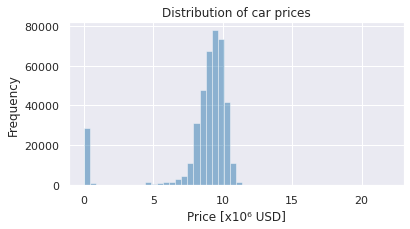

In [33]:
plot_histogram(df.logprice) 

Yes, this histogram is evenly distributed. Now, it will be easier for us to remove outliers from our dataset by using the IQR method.

But before we apply this method, we will change the datatype of the price column to `string`. This will ensure that the IQR method is not applied to the price column. Later, once we have removed outliers from the dataset, we will change the data type of its price column back to `int64`.

In [34]:
df['price'] = df.price.astype(str)

Now, it's time to apply the IQR method.

To begin with, we will calculate the Q1 and Q3 values and the IQRs of the numerical columns in the dataset.

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [36]:
Q1

year         2007.000000
odometer    51481.000000
lat            34.268300
long         -111.126000
logprice        8.507345
Name: 0.25, dtype: float64

In [37]:
Q3

year          2015.000000
odometer    137000.000000
lat             42.490600
long           -81.455300
logprice         9.792612
Name: 0.75, dtype: float64

In [38]:
IQR

year            8.000000
odometer    85519.000000
lat             8.222300
long           29.670700
logprice        1.285267
dtype: float64

Next, we will update the dataset, applying the IQR formula to remove outliers.

In [39]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Finally, we will revert the data type of the price column to its original value.

In [40]:
df['price'] = df.price.astype(np.int64)

Next, let us sort the dataset and browse through some of its rows.

In [41]:
df.sort_values(by=['year','manufacturer', 'price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [42]:
df.iloc[np.r_[0:3, -3:0]]

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,logprice,price
0,greensboro,1995.0,acura,integra,fair,5 cylinders,gas,159204.35,clean,automatic,4wd,full-size,pickup,grey,nc,36.0726,-79.7920,7.003974,1100
1,baltimore,1995.0,acura,integra,excellent,4 cylinders,gas,160370.00,clean,automatic,4wd,full-size,pickup,grey,md,39.3414,-76.5469,7.438972,1700
2,baltimore,1995.0,acura,integra,excellent,4 cylinders,gas,160370.00,clean,automatic,4wd,full-size,pickup,grey,md,39.3414,-76.5469,7.438972,1700
349378,flint,2021.0,nissan,xterra,good,6 cylinders,gas,86000.00,clean,automatic,4wd,full-size,pickup,red,mi,42.8511,-83.4512,8.974745,7900
349379,tulsa,2021.0,toyota,prius,like new,4 cylinders,hybrid,47000.00,clean,automatic,fwd,full-size,hatchback,red,ok,36.0544,-95.7223,9.159152,9500
349380,columbia,2021.0,volvo,s60,excellent,5 cylinders,gas,127000.00,clean,automatic,4wd,full-size,sedan,grey,sc,33.9902,-81.1587,8.497195,4900


As the dataset is quite clean now, we can reduce the number of car models in it. We will delete data about models that appear less than 1000 times in the dataset. To exclude most incorrect combinations of manufacturers and models, we will also remove manufacturers that are listed less than 1000 times.

These steps will dramatically reduce the chance of unrealistic model names and manufacturer-model combinations appearing in our dataset. They will also ensure that the proposed machine-learning models have enough relevant data to understand the interrelations between car attributes or characteristics and their prices.

Here is the code that will update the dataset according to the above requirements:

In [43]:
df = df.groupby("model").filter(lambda x: len(x) >= 1000)
df = df.groupby("manufacturer").filter(lambda x: len(x) >= 1000)
df.reset_index(drop=True, inplace=True)

The standard summary statistics of the updated dataset are as follows:

In [44]:
df.describe()

,year,odometer,lat,long,logprice,price
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2011.244541,104683.923358,38.416911,-93.840864,9.264771,13854.759389
std,5.190968,56414.282774,5.306740,15.894866,0.778009,10239.997404
min,1995.000000,0.000000,22.910200,-124.441000,6.621406,750.000000
25%,2008.000000,61407.875000,35.024200,-105.066000,8.747670,6295.000000
50%,2012.000000,103690.000000,39.055100,-90.137900,9.305741,11000.000000
75%,2015.000000,143909.800000,42.484500,-81.481100,9.825310,18495.000000
max,2021.000000,265135.000000,51.879800,-54.184600,11.618294,111111.000000


What are the rounded mean, median, and mode of the target variable, price?

In [45]:
print('Mean: ', round(df.price.mean()))
print()
print('Median: ', round(df.price.median()))
print()
print('Mode: ', df.price.mode()[0])

Mean:  13855

Median:  11000

Mode:  6995


The mean is greater than the median, and the median is greater than the mode. This indicates that most prices in the price column are on the lower side and a few are much higher. The following histogram proves this:

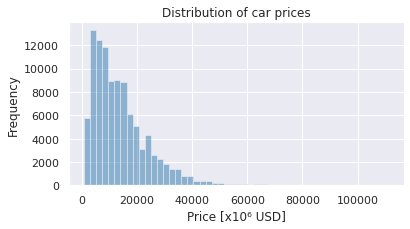

In [46]:
plot_histogram(df.price)

Later in the project, we will make sure that we pass on logarithmic versions of these prices to our machine-learning models. For now, though, let us look further into the cleaned data that we&nbsp;have.

First, we will look at the number of cars per manufacturer.

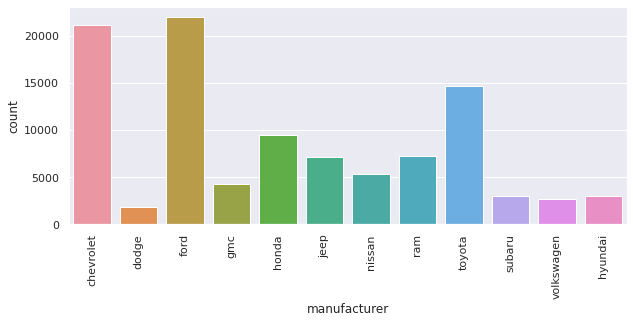

In [47]:
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.countplot(df.manufacturer);

Next, let us look at the counts of some of the other categorical variables.

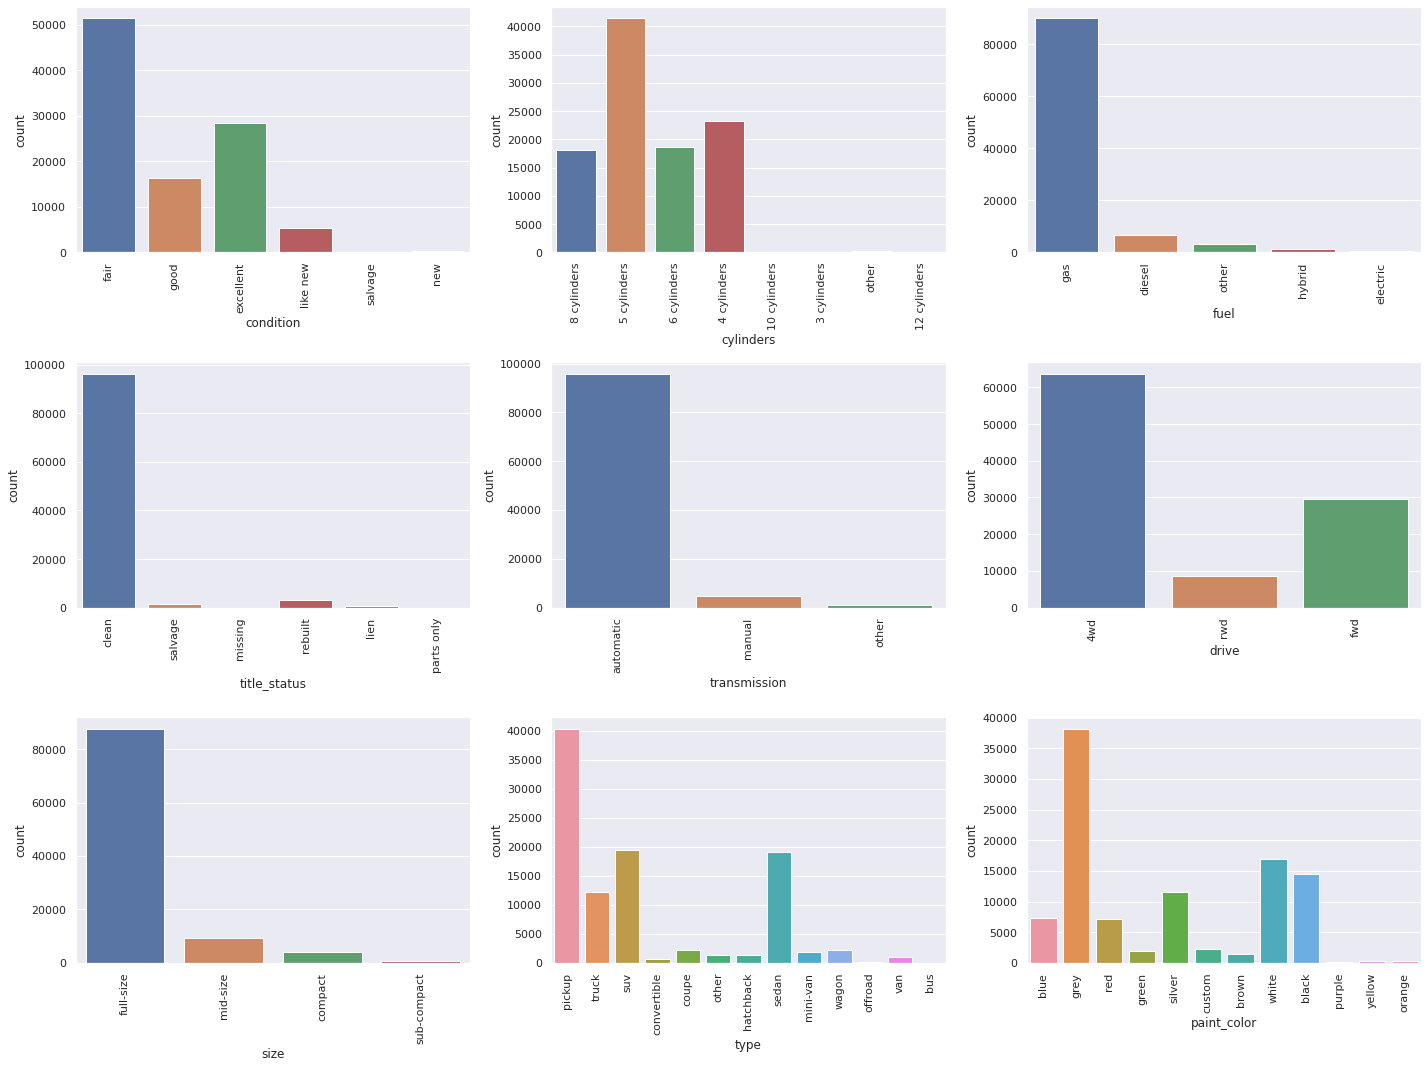

In [48]:
categ_x = categorical.copy()
categ_x.remove('region')
categ_x.remove('state')

fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for variable, subplot in zip(categ_x, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

The graphs above tells us that a majority of cars are in fair condition, are gas powered, have five cylinders, and have automatic transmission.

Next, let us look at how prices are interrelated with various categorical variables.

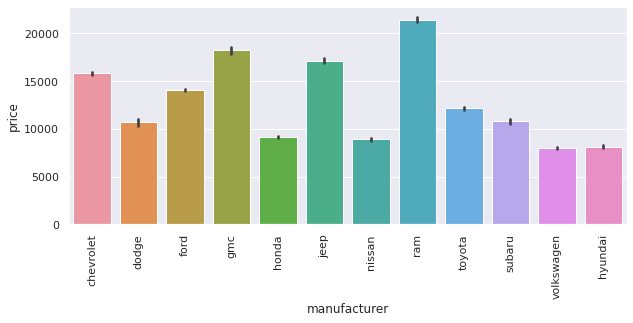

In [49]:
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.barplot(x='manufacturer', y='price', data=df);

As the graph above indicates, Ram Trucks lead on the price front.

And the following graphs show that new cars, diesel cars, cars that have liens on them, and cars with four-wheel drives have higher average prices than other types of cars in their respective categories.

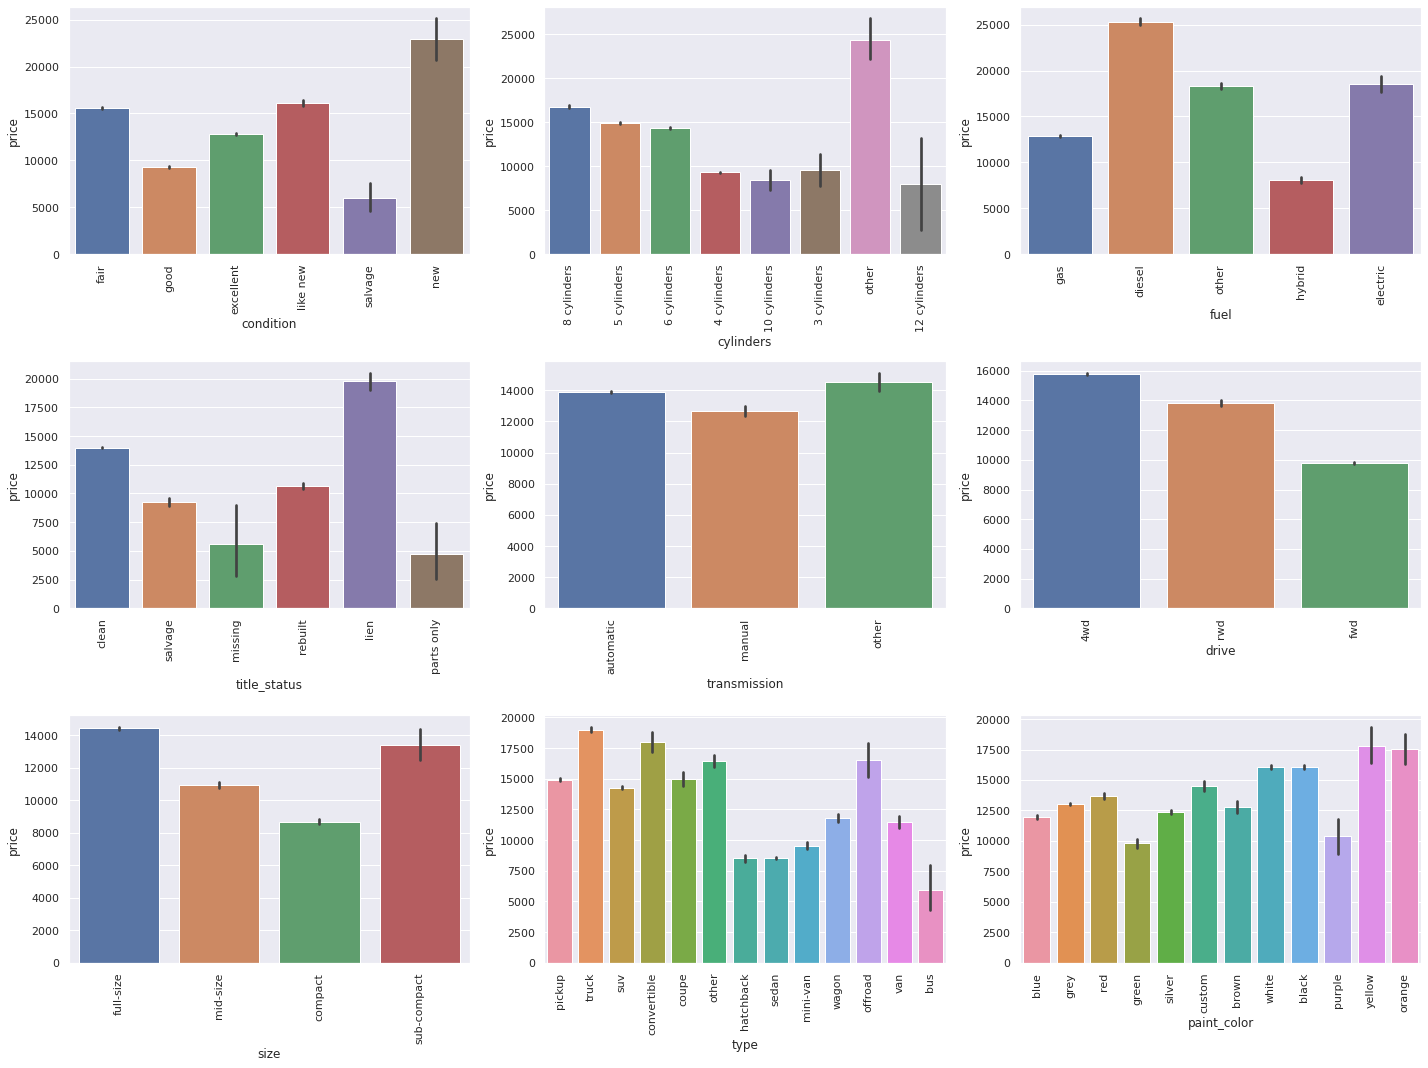

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for var, subplot in zip(categ_x, ax.flatten()):
    sns.barplot(x=var, y='price', data=df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

Let us also look at how prices vary with year of manufacture.

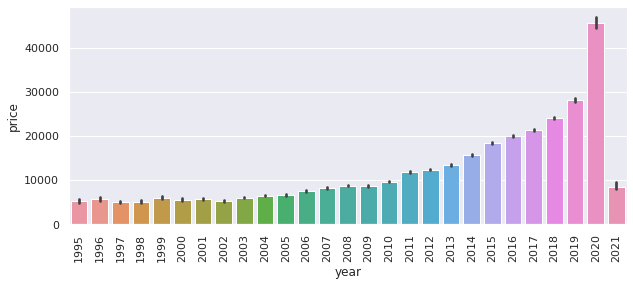

In [51]:
year = df.year.astype(np.int64)
price = df.price
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.barplot(year, price);

The above graph shows that prices increase fairly consistently with year.

What about comparing three sets of variables? How are the fuel and price variables related to condition? The following graphs provide an answer to this question, as well as questions about other triadic combinations.

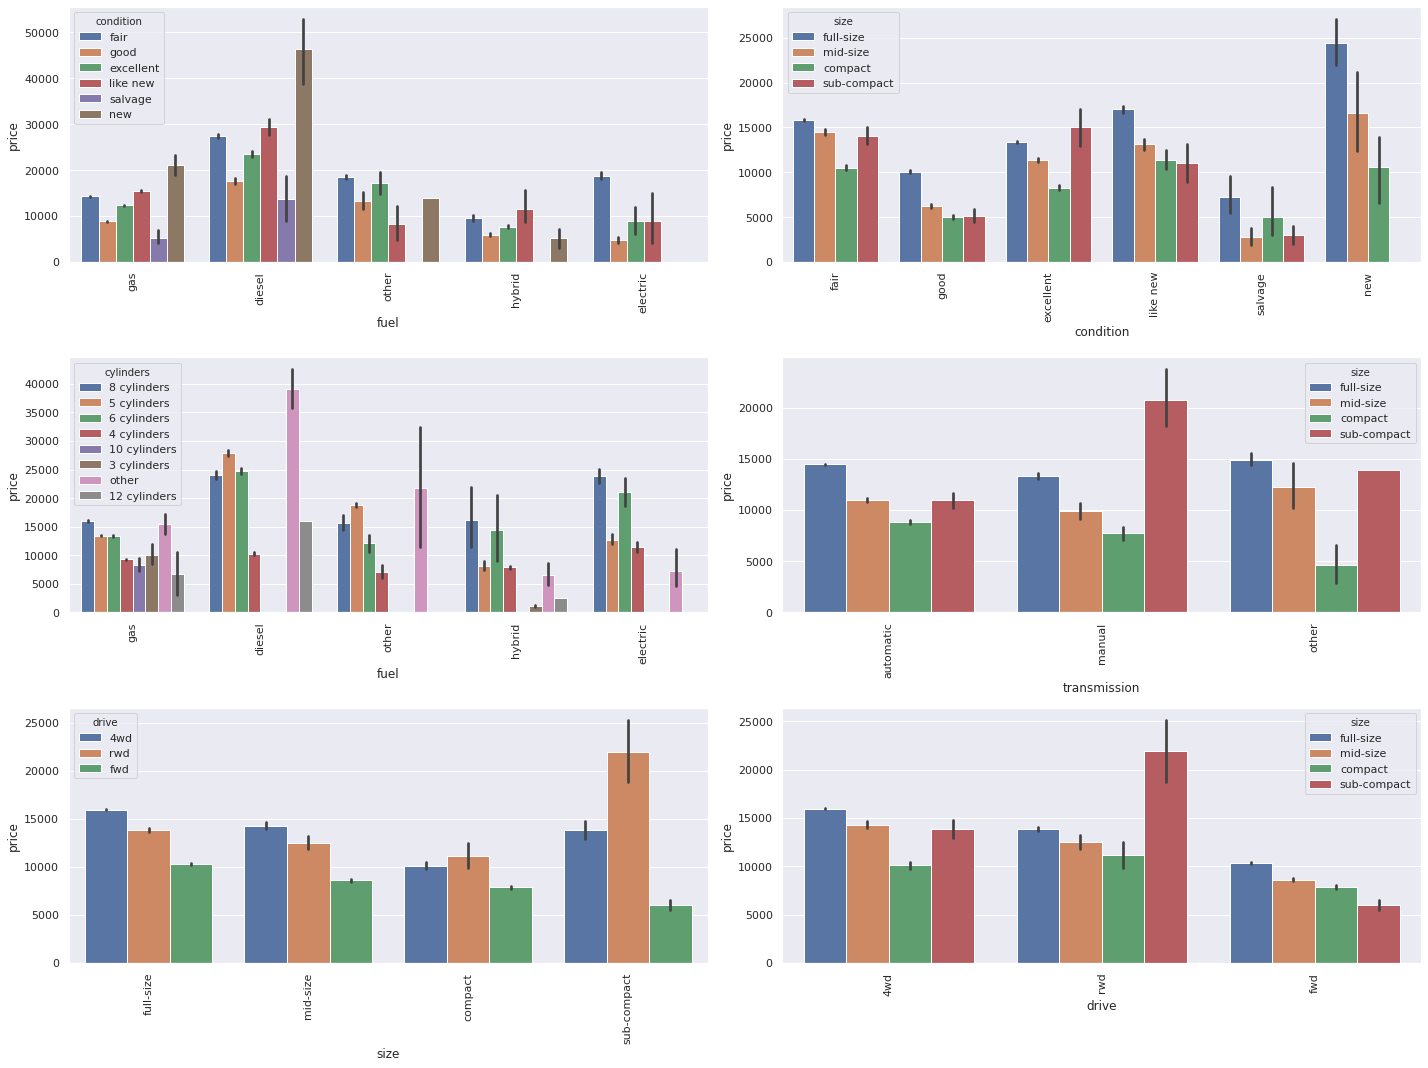

In [52]:
factor_combos = [('fuel', 'condition'), ('condition', 'size'),\
                 ('fuel', 'cylinders'), ('transmission', 'size'),\
                 ('size', 'drive'), ('drive', 'size')]
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for var, subplot in zip(factor_combos, ax.flatten()):
    sns.barplot(x=var[0], y='price', hue=var[1], data=df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

So, all the car characteristics in our dataset have some impact on the target variable, price. To determine the interdependence among these variables mathematically, let us calculate the correlation between them.

In [53]:
df.corr()

,year,odometer,lat,long,logprice,price
year,1.000000,-0.637043,0.000722,-0.057453,0.646895,0.574147
odometer,-0.637043,1.000000,-0.000768,0.080251,-0.526544,-0.511279
lat,0.000722,-0.000768,1.000000,-0.112878,0.054145,0.042265
long,-0.057453,0.080251,-0.112878,1.000000,-0.140108,-0.134516
logprice,0.646895,-0.526544,0.054145,-0.140108,1.000000,0.894127
price,0.574147,-0.511279,0.042265,-0.134516,0.894127,1.000000


Correlation varies between -1 and 1. A positive correlation value indicates direct proportion, and a negative correlation value indicates inverse proportion.

If a pair of values are positively correlated, they increase or decrease in unison. Consider the year of manufacture and the price of a car. These values are positively correlated. The more recent or higher the year of manufacture of a vehicle is, the higher is its price.

If a pair of values are negatively correlated, they travel on the Cartesian plane in opposite directions. If one value increases, the other decreases. Odometer readings and car prices are inversely correlated. The higher the odometer reading of a car is, the lower is its price.

The strength of a correlation depends on how close the absolute value of the correlation is to 1. For example, a correlation of 0.8 denotes a strong positive correlation. The -0.8 is indicative of a strong negative correlation.

The correlation table above indicates average positive correlation between price and year and average negative correlation between price and odometer reading.

The proposed machine-learning models should be able to learn effectively from the car dataset if we allocate adequate data to train and test them. In the next step, we will work in this direction.

Before we proceed to the next step, let us save the updated dataset as a CSV&nbsp;file.

In [54]:
df.to_csv('vehicles_viz.csv', index=False)

<h2>Step 5: Splitting the dataset<a aria-pressed="true" class="btn btn-primary btn-sm" data-toggle="popover" id='step5-desc' href="#step5" role="button" style="color: white; margin-left: 20px; target='_self'">Go to steplist</a></h2>

We will begin this step by importing the CSV file that we had saved in the previous&nbsp;step.

In [55]:
df = pd.read_csv('vehicles_viz.csv')

Next, we will drop the price column because the logprice column, whose values are uniformly distributed, is more conducive to machine learning.

In [56]:
df.drop('price', axis=1, inplace=True)

We will also update the list of categorical columns.

In [57]:
from collections import Counter
categorical = list((Counter(df.columns) -\
                    Counter(numerical + ['logprice', 'price'])).elements())
categorical

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

The list of numerical columns is already up to date.

In [58]:
numerical

['year', 'odometer', 'lat', 'long']

Machine-learning algorithms can interpret numerical values with a high degree of precision. But these algorithms can misinterpret categorical data. Therefore, we must convert the categorical data in our dataset into numerical values.

The following code can perform the conversion:

In [59]:
# Using the encoder instance of preprocessing.LabelEncoder(),
# which we had declared earlier in this noebook

df[categorical] = df[categorical].apply(encoder.fit_transform)

Here are the first few rows of the updated dataset:

In [60]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,logprice
0,31,1995.0,0,44,1,6,2,154737.0,0,0,0,1,7,1,15,38.9957,-86.7568,6.621406
1,299,1995.0,0,2,1,6,2,245757.0,0,0,2,1,10,5,43,29.4969,-98.4032,6.803505
2,191,1995.0,0,44,1,6,2,203999.4,0,1,2,1,7,8,35,41.0449,-83.6457,6.908755
3,278,1995.0,0,49,1,4,2,182000.0,0,0,0,1,7,5,5,38.0412,-104.7160,7.090910
4,293,1995.0,0,47,1,4,2,115437.4,0,0,0,1,7,5,4,38.4689,-121.3440,7.313887


Next, we need to rescale and uniformize the values in selected columns. If these values are uniformly distributed, machine-learning algorithms will process them efficiently.

The logprice column is already uniformly distributed. To uniformize the other numerical columns, we will use the StandardScaler module of scikit-learn. StandardScaler can rescale a set of numerical values, giving the set a mean of 0 and a standard deviation of&nbsp;1.

Here is code that implements our requirements:

In [61]:
columns_to_scale = numerical + ['model', 'region']

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in columns_to_scale:
    df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1,1))

Having normalized relevant values, we will now apply the IQR method to remove any additional outliers from the dataset.

In [63]:
Q1 = df.logprice.quantile(0.25)
Q3 = df.logprice.quantile(0.75)
IQR = Q3 - Q1

df = df[(df.logprice >= (Q1 - 1.5 * IQR)) & (df.logprice <= (Q3 + 1.5 * IQR))]

Let us look at the first few rows of the updated dataset:

In [64]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,logprice
4,0.867922,-3.129401,0,1.364314,1,4,2,0.190617,0,0,0,1,7,5,4,0.009797,-1.730324,7.313887
5,0.600651,-3.129401,0,1.489556,2,5,2,-0.533267,0,0,0,1,9,4,4,-0.881640,-1.409653,7.467942
6,1.609383,-3.129401,0,1.113830,1,4,2,-0.134433,0,1,0,1,7,5,48,1.150296,0.269401,7.601402
7,-0.830541,-3.129401,0,1.113830,1,4,2,1.067391,5,0,0,1,7,5,43,-1.247648,-0.800523,7.601402
8,1.264517,-3.129401,0,1.113830,2,6,2,0.874181,0,0,0,1,10,8,14,0.148602,0.265519,7.601402


Finally, we will split the dataset.

In [65]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:,-1:].values.T[0]

X_train, X_test, y_train, y_test =\
train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0)

Before we proceed to the next step, let us write a couple of helper functions.

In [66]:
def remove_negatives(y_test, y_pred):
    '''This function will remove any negative values from predictions'''
    ind = [index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred = y_pred[ind]
    y_test = y_test[ind]
    return (y_test, y_pred)    

In [67]:
from sklearn.metrics import mean_squared_log_error,\
r2_score

def evaluate_perf(y_test, y_pred):
    '''This function will generate metrics about the
    performance of a model.'''
    res = []
    res.append(mean_squared_log_error(y_test, y_pred))
    res.append(np.sqrt(res[0]))
    res.append(r2_score(y_test, y_pred))
    res.append(round(r2_score(y_test, y_pred)*100, 4))
    return (res)

We will also create a dataframe to store any performance metrics that the `evaluate_perf` function returns. This dataframe will contain four&nbsp;rows.

Among the row indexes of the dataframe, MSLE stands for mean squared logarithmic error and RMSLE is root MSLE. We can use MSLE and RMSLE to determine the variation between actual target values and target values that are predicted by a machine-learning model.

The third index, R2 score, refers to the r-squared (R2) statistical measure. Like MSLE, R2 also signifies the variance between predicted and actual values. R2 "is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)<sup id="r2" style="font-size: x-small">[[1]](#r2-wiki)</sup>"

R2 scores are restricted to the range 0–1. A positive R2 score means that the machine-learning algorithm that we are evaluating is effective. An R2 score of 0 means that the machine-learning model is just returning the average of the actual variables.

In [68]:
df_metrics = pd.DataFrame(index=['MSLE', 'RMSLE',\
                                 'R2 score','Accuracy(%)'])

<h2>Step 6: Building and validating models<a aria-pressed="true" class="btn btn-primary btn-sm" data-toggle="popover" id='step6-desc' href="#step6" role="button" style="color: white; margin-left: 20px; target='_self'">Go to steplist</a></h2>

Our first model will be a linear regressor.

### Building the linear regressor

We will use the following code to build the model:

In [69]:
from sklearn.linear_model import LinearRegression

# Instantiating a linear regressor
lin_reg = LinearRegression()

# Fitting a linear-regression model
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

### Validating the linear regressor

Here is code that will validate the model:

In [70]:
# Validating the model by identifying errors
y_test_1, y_pred_1 = remove_negatives(y_test, y_pred)
res_lin_reg = evaluate_perf(y_test_1, y_pred_1)

print("Coefficients: \n", lin_reg.coef_)
print(f"MSLE : {res_lin_reg[0]}")
print(f"Root MSLE : {res_lin_reg[1]}")
print(f"R2 Score : {res_lin_reg[2]} or {res_lin_reg[3]}%")

df_metrics["Linear"] = res_lin_reg

Coefficients: 
 [-0.00102889  0.41606396  0.001659    0.06439945 -0.03045486  0.19953534
 -0.18566059 -0.17556433 -0.07924963  0.10806318 -0.1517559  -0.00917437
 -0.00817653  0.00247471  0.0006096  -0.00536927 -0.06197905]
MSLE : 0.0020880554250480216
Root MSLE : 0.0456952451032711
R2 Score : 0.62175873076096 or 62.1759%


How did the actual and predicted values vary? Let us draw a bar graph to compare some of these values.

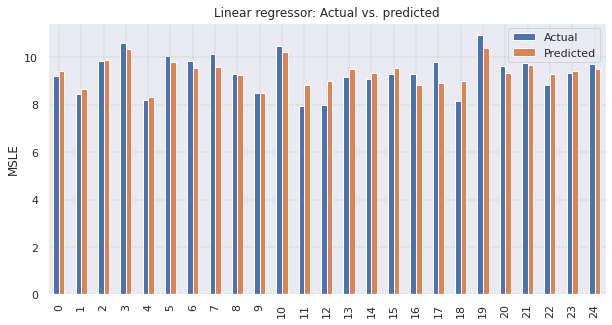

In [71]:
df_lin_comp = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_lin_comp = df_lin_comp.head(25)

df_lin_comp.plot(kind='bar', figsize=(10,5))

plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.title('Linear regressor: Actual vs. predicted')
plt.ylabel('MSLE')
plt.show()

Next, let us see how the linear regressor ranked independent variables.

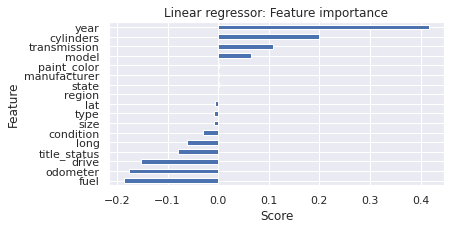

In [72]:
coefs = pd.Series(lin_reg.coef_, index = X_train.columns)
sorted_coefs = coefs.sort_values()

sorted_coefs.plot(kind = "barh")

plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.xlabel('Score'); 
plt.ylabel('Feature'); 
plt.title('Linear regressor: Feature importance')

plt.show()

Next, we will work on a random-forest regressor.

## Building the random-forest regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=180,
                               random_state=0,
                               min_samples_leaf=1,
                               max_features=0.5,
                               n_jobs=-1,
                               oob_score=True)

rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)

## Validating the random-forest regressor

In [74]:
y_test_1, y_pred_1 = remove_negatives(y_test, y_pred)
res_rf_reg = evaluate_perf(y_test_1, y_pred_1)

print(f"MSLE : {res_rf_reg[0]}")
print(f"Root MSLE : {res_rf_reg[1]}")
print(f"R2 Score : {res_rf_reg[2]} or {res_rf_reg[3]}%")

df_metrics['RandomForest'] = res_rf_reg

MSLE : 0.0005951053626870983
Root MSLE : 0.024394781464220954
R2 Score : 0.8981309659838176 or 89.8131%


How did the actual and predicted values vary? Let us draw a bar graph to compare some of these values.

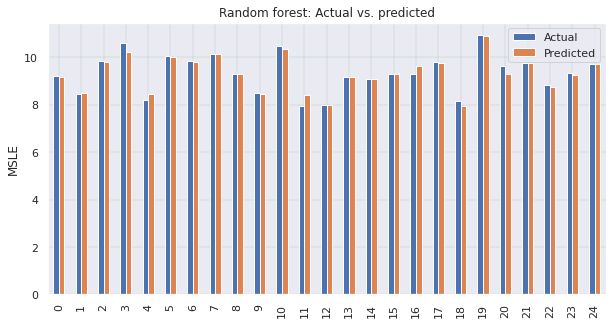

In [75]:
df_rf_comp = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_rf_comp = df_rf_comp.head(25)

df_rf_comp.plot(kind='bar', figsize=(10,5))

plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.title('Random forest: Actual vs. predicted')
plt.ylabel('MSLE')

plt.show()

Let us also depict the random-forest ranking of independent variables.

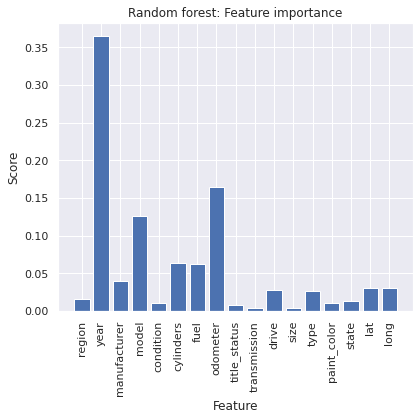

In [76]:
importances = rf_reg.feature_importances_
features = X_train.columns
x_vals = list(range(len(importances)))

plt.figure(figsize=(6,6))
plt.bar(x_vals, importances, orientation = ('vertical'))

plt.xticks(x_vals, features, rotation=90)
plt.ylabel('Score'); 
plt.xlabel('Feature'); 
plt.title('Random forest: Feature importance')

plt.tight_layout()
plt.show();

Finally, we will work on an XGBoost regressor.

## Building the XGBoost regressor

In [77]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          learning_rate = 0.4,
                          max_depth = 24,
                          alpha = 5,
                          n_estimators = 200)

xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

## Validating the XGBoost regressor

In [78]:
y_test_1, y_pred_1 = remove_negatives(y_test, y_pred)
res_xg_reg = evaluate_perf(y_test_1,y_pred_1)

print(f"MSLE : {res_xg_reg[0]}")
print(f"Root MSLE : {res_xg_reg[1]}")
print(f"R2 Score : {res_xg_reg[2]} or {res_xg_reg[3]}%")

df_metrics['XGBoost'] = res_xg_reg

# Saving the metrics dataframe as a CSV file because
# it contains data about each of the three models now
df_metrics.to_csv('error_metrics.csv')

MSLE : 0.0005885929750876164
Root MSLE : 0.024260935165150092
R2 Score : 0.898667610636523 or 89.8668%


To round off this step, let us depict the XGBoost ranking of independent variables.

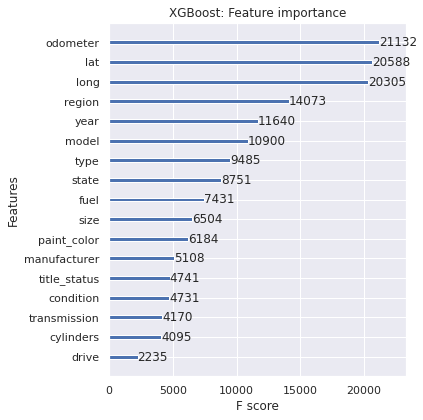

In [79]:
xgb.plot_importance(xg_reg)

plt.rcParams['figure.figsize'] = [5, 5]
plt.title('XGBoost: Feature importance')

plt.tight_layout()
plt.show();

<h2>Step 7: Identifying the most appropriate model<a aria-pressed="true" class="btn btn-primary btn-sm" data-toggle="popover" id='step7-desc' href="#step7" role="button" style="color: white; margin-left: 20px; target='_self'">Go to steplist</a></h2>

As the following table and graph indicate, the linear regressor is the least accurate model. Random forest and XGBoost have performed much better than the linear regressor in multiple iterations of the code. And the accuracies of these high performers have been on a par mostly. 

But if I had to choose one regressor for this type of project, it would be XGBoost. If an XGBoost model is tuned properly, it can reduce bias and variance and give accurate results. What adds to its appeal is that it is optimized for speed and real-world performance.

In [80]:
df_metrics = pd.read_csv('error_metrics.csv', index_col=0)
df_metrics

,Linear,RandomForest,XGBoost
MSLE,0.002088,0.000595,0.000589
RMSLE,0.045695,0.024395,0.024261
R2 score,0.621759,0.898131,0.898668
Accuracy(%),62.175900,89.813100,89.866800


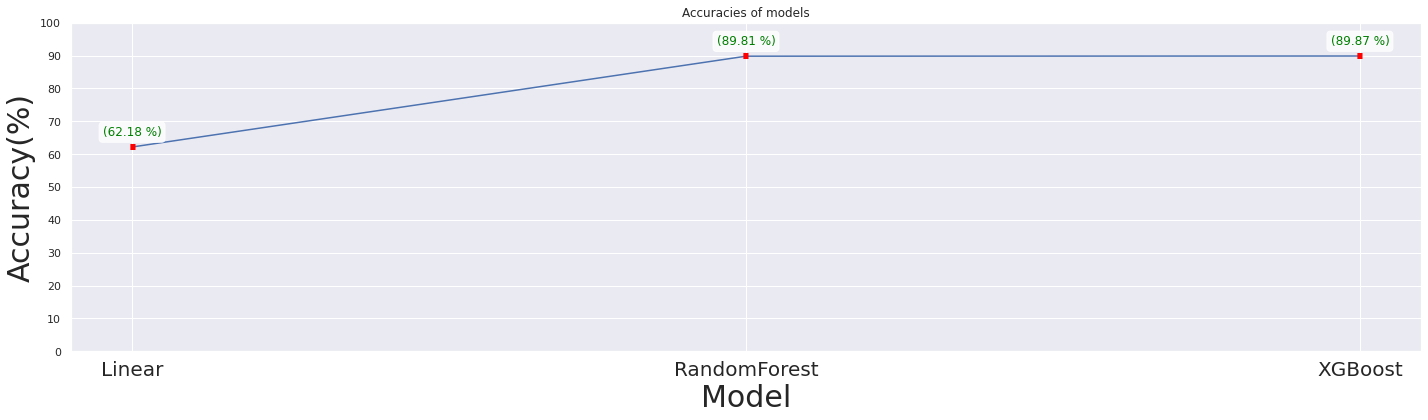

In [105]:
accuracies = df_metrics.loc['Accuracy(%)']

x = list(range(len(accuracies)))
y = list(range(0, 101, 10))

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20, 6))

plt.plot(accuracies)

plt.yticks(y)
plt.xticks(fontsize=20)
plt.xlabel("Model", fontsize=30)
plt.ylabel("Accuracy(%)", fontsize=30)
plt.title("Accuracies of models")

for a, b in zip(x, y):
    b = accuracies[a]
    val="(" + str(round(accuracies[a], 2)) + " %)"
    plt.text(a, b + 4.5, val, horizontalalignment='center',\
             verticalalignment='center', color='green', bbox=props)
    plt.text(a, b + 3.5, '.', horizontalalignment='center',\
             verticalalignment='center', color='red', fontsize=50)
    
plt.tight_layout()
plt.show();

## References

- Panwar Abhash Anil, "Used Car Price Prediction using Machine Learning," Medium (blog), Towards Data Science, August 3, 2020, https://towardsdatascience.com/used-car-price-prediction-using-machine-learning-e3be02d977b2.

- Soner Yıldırım, "Predicting Used Car Prices with Machine Learning," Medium (blog), Towards Data Science, January 28, 2020, https://towardsdatascience.com/predicting-used-car-prices-with-machine-learning-fea53811b1ab.

## Footnote

<a name="r2-wiki">1</a>: "Coefficient of determination," Wikimedia Foundation, last modified September 4, 2020, 04:49, https://en.wikipedia.org/wiki/Coefficient_of_determination. [↩](#r2)